# Feature Points Detection

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

imagesDir = '../data/images' # Change this, according to your images' directory path

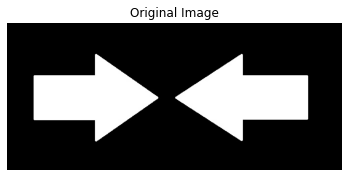

In [3]:
filename = 'corners_01.jpg'
img = cv2.imread(os.path.join(imagesDir, filename))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

og_img = img.copy() # let's copy the image to be able to use it later without having to read it again

## Corner Detection

[Harris Corner Detector](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345)

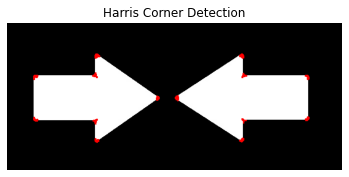

In [36]:
def harrisCornerDetection(currImg, neighbourhood, aperture, free_param, thr):
    gray = cv2.cvtColor(currImg, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    dst = cv2.cornerHarris(gray, neighbourhood, aperture, free_param)

    # result is dilated for marking the corners, not important
    dst = cv2.dilate(dst, None)

    currImg[dst > thr*dst.max()] = [0,0,255]

    # convert to RGB for plotting with matplotlib
    out = cv2.cvtColor(currImg, cv2.COLOR_BGR2RGB)

    plt.imshow(out)
    plt.title('Harris Corner Detection')
    plt.axis('off')
    plt.show()

harrisCornerDetection(img.copy(), 2, 3, 0.08, 0.01)

[Shi-Tomasi Corner Detector](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541)

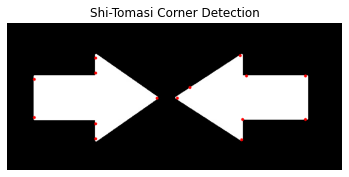

In [39]:
def shiTomasiCornerDetection(currImg, neighbourhood, free_param, max_corners, quality, mindist):
    gray = cv2.cvtColor(currImg, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    corners = cv2.goodFeaturesToTrack(gray, max_corners, quality, mindist, blockSize=neighbourhood, k=free_param)
    corners = np.int0(corners)

    img2 = og_img.copy()
    for i in corners:
        x,y = i.ravel()
        cv2.circle(img2, (x,y), 3, 255, -1)
        
    plt.imshow(img2)
    plt.title('Shi-Tomasi Corner Detection')
    plt.axis('off')
    plt.show()

shiTomasiCornerDetection(img.copy(), 2, 0.08, 200, 0.2, 10)

[FAST Corner Detector](https://docs.opencv.org/4.x/df/d74/classcv_1_1FastFeatureDetector.html)

Threshold: 10
NMS:True
Neighborhood: 2
Total Keypoints with NMS: 46


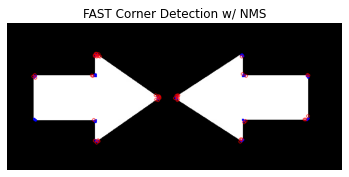

Total Keypoints without NMS: 314


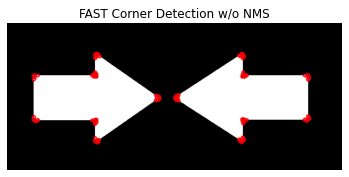

In [40]:
def fastCornerDetection(currImg):
    # Initiate FAST object with default values
    fast = cv2.FastFeatureDetector_create()

    # find and draw the keypoints
    kp = fast.detect(currImg, None)
    img3 = cv2.drawKeypoints(currImg, kp, None, color=(255,0,0))

    # Print all default params
    print("Threshold: {}".format(fast.getThreshold()))
    print("NMS:{}".format(fast.getNonmaxSuppression()))
    print("Neighborhood: {}".format(fast.getType()))
    print("Total Keypoints with NMS: {}".format(len(kp)))

    plt.imshow(img3)
    plt.title('FAST Corner Detection w/ NMS')
    plt.axis('off')
    plt.show()

    # Disable NMS
    fast.setNonmaxSuppression(0)
    kp = fast.detect(currImg, None)
    print("Total Keypoints without NMS: {}".format(len(kp)))
    img4 = cv2.drawKeypoints(currImg, kp, None, color=(255,0,0))

    plt.imshow(img4)
    plt.title('FAST Corner Detection w/o NMS')
    plt.axis('off')
    plt.show()

fastCornerDetection(img.copy())

In [ ]:
# 9d) Resize the images, downsizing them to 1/4 of their original size and reapply the corner detection algorithms

# Resize the image to 1/4 of its original size
small_img = cv2.resize(img, (0,0), fx=0.25, fy=0.25)

# Apply the corner detection algorithms
harrisCornerDetection(small_img.copy(), 2, 3, 0.08, 0.01)
shiTomasiCornerDetection(small_img.copy(), 2, 0.08, 200, 0.2, 10)
fastCornerDetection(small_img.copy())


## Blob Detection

[SIFT Blob Detector](https://docs.opencv.org/4.x/d7/d60/classcv_1_1SIFT.html)

In [ ]:
new_img = cv2.imread(os.path.join(imagesDir, 'stitch_building01_1.png'))
gray = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.show()

In [ ]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints
kp = sift.detect(gray,None)

# draw the keypoints (with size and orientation)
sift_img = cv2.drawKeypoints(gray, kp, new_img, (-1, -1, -1), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(sift_img)
plt.title('SIFT')
plt.axis('off')
plt.show()

[Orb Blob Detector](https://docs.opencv.org/4.x/db/d95/classcv_1_1ORB.html)

In [ ]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(new_img, None)

# compute the descriptors with ORB
kp, des = orb.compute(new_img, kp)

# draw only keypoints location, not size and orientation
orb_img = cv2.drawKeypoints(new_img, kp, None, (-1, -1, -1), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(orb_img)
plt.title('Orb')
plt.axis('off')
plt.show()

## Matching

In [ ]:
query = cv2.imread(os.path.join(imagesDir, 'match_box01a_1.png'), cv2.IMREAD_GRAYSCALE) # queryImage
train = cv2.imread(os.path.join(imagesDir, 'match_box01a_2.png'), cv2.IMREAD_GRAYSCALE) # trainImage

plt.imshow(query, cmap='gray')
plt.title('Query Image')
plt.axis('off')
plt.show()

plt.imshow(train, cmap='gray')
plt.title('Train Image')
plt.axis('off')
plt.show()

plt.show()

In [ ]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(query, None)
kp2, des2 = orb.detectAndCompute(train, None)

In [ ]:
# create a Brute Force Matcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
match_output = cv2.drawMatches(query, kp1, train, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(match_output)
plt.title('Match Result')
plt.axis('off')
plt.show()